# Machine Learning Linear Regression Model
***

### Importing Dependencies

In [1]:
# Importing dependencies:
import numpy as np
import pandas as pd

### Read the CSV and Perform Basic Data Cleaning

In [2]:
# Reading the csv file into a pandas DataFrame
mmr_without_race = pd.read_csv('../Resources/non_race_data.csv')
mmr_without_race

,year,state,id,state_code,latitude,longitude,deaths,births,maternal_mortality_ratio,population,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,2015,Alabama,US.AL,AL,32.318231,-86.902298,12.0,59657.0,20.11,2505795.0,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,2016,Alabama,US.AL,AL,32.318231,-86.902298,35.0,59151.0,59.17,2507714.0,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,2017,Alabama,US.AL,AL,32.318231,-86.902298,41.0,58941.0,69.56,2514911.0,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,2018,Alabama,US.AL,AL,32.318231,-86.902298,31.0,57761.0,53.67,2523756.0,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,2019,Alabama,US.AL,AL,32.318231,-86.902298,35.0,58615.0,59.71,2533668.0,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2014,Wisconsin,US.WI,WI,43.784440,-88.787868,16.0,67161.0,23.82,2898057.0,...,6207.0,18.7,9.0,0.165,0.067,415.4,2.0,21.9,125.0,7.1
304,2015,Wisconsin,US.WI,WI,43.784440,-88.787868,11.0,67041.0,16.41,2903737.0,...,6365.0,17.4,8.2,0.146,0.046,411.6,1.9,19.6,125.3,7.0
305,2016,Wisconsin,US.WI,WI,43.784440,-88.787868,15.0,66615.0,22.52,2905282.0,...,6324.0,17.3,6.5,0.114,0.106,403.2,1.9,18.0,140.3,7.3
306,2017,Wisconsin,US.WI,WI,43.784440,-88.787868,12.0,64975.0,18.47,2912745.0,...,6437.0,17.1,5.5,0.201,0.072,423.5,1.9,16.2,145.2,7.3


In [3]:
# Checking dataframe rows
mmr_without_race.count()

year                        308
state                       308
id                          308
state_code                  308
latitude                    308
longitude                   308
deaths                      308
births                      308
maternal_mortality_ratio    308
population                  308
employer                    308
non_group                   308
medicaid                    308
medicare                    308
military                    308
uninsured                   308
air_pollution_val           308
cancer_death_val            308
cardio_death_val            308
child_pov_val               308
choles_check_val            308
dent_vis_val                308
dentists_val                308
diabetes_val                308
drug_deaths_val             308
health_stat_fem_val         308
immun_child_val             308
income_ineq_val             308
infant_mort_val             308
infect_dis_val              308
obesity_val                 308
phys_ina

In [4]:
# Checking data types and columns
mmr_without_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      308 non-null    int64  
 1   state                     308 non-null    object 
 2   id                        308 non-null    object 
 3   state_code                308 non-null    object 
 4   latitude                  308 non-null    float64
 5   longitude                 308 non-null    float64
 6   deaths                    308 non-null    float64
 7   births                    308 non-null    float64
 8   maternal_mortality_ratio  308 non-null    float64
 9   population                308 non-null    float64
 10  employer                  308 non-null    float64
 11  non_group                 308 non-null    float64
 12  medicaid                  308 non-null    float64
 13  medicare                  308 non-null    float64
 14  military  

In [5]:
mmr_without_race.columns

Index(['year', 'state', 'id', 'state_code', 'latitude', 'longitude', 'deaths',
       'births', 'maternal_mortality_ratio', 'population', 'employer',
       'non_group', 'medicaid', 'medicare', 'military', 'uninsured',
       'air_pollution_val', 'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'choles_check_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'drug_deaths_val', 'health_stat_fem_val',
       'immun_child_val', 'income_ineq_val', 'infant_mort_val',
       'infect_dis_val', 'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'uninsured_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'teen_birth_val',
       'primary_care_val', 'low_birthweight_val'],
      dtype='object')

### Selected Features for the model

In [6]:
# Selecting the features from the dataframe that will be the X values
selected_features = mmr_without_race[['deaths',
       'births', 'maternal_mortality_ratio', 'population', 'employer',
       'non_group', 'medicaid', 'medicare', 'military', 'uninsured',
       'air_pollution_val', 'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'choles_check_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'drug_deaths_val', 'health_stat_fem_val',
       'immun_child_val', 'income_ineq_val', 'infant_mort_val',
       'infect_dis_val', 'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'uninsured_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'teen_birth_val',
       'primary_care_val', 'low_birthweight_val']]
selected_features.head()

,deaths,births,maternal_mortality_ratio,population,employer,non_group,medicaid,medicare,military,uninsured,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,12.0,59657.0,20.11,2505795.0,57.4,8.9,13.6,4.0,2.2,13.9,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,35.0,59151.0,59.17,2507714.0,58.7,9.1,13.8,3.8,1.9,12.7,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,41.0,58941.0,69.56,2514911.0,58.0,8.6,13.6,4.2,2.3,13.3,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,31.0,57761.0,53.67,2523756.0,58.8,7.5,13.7,3.6,2.5,13.9,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,35.0,58615.0,59.71,2533668.0,58.8,7.8,13.9,3.8,2.4,13.3,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3


### Ploting Data for Visualization

<AxesSubplot:>

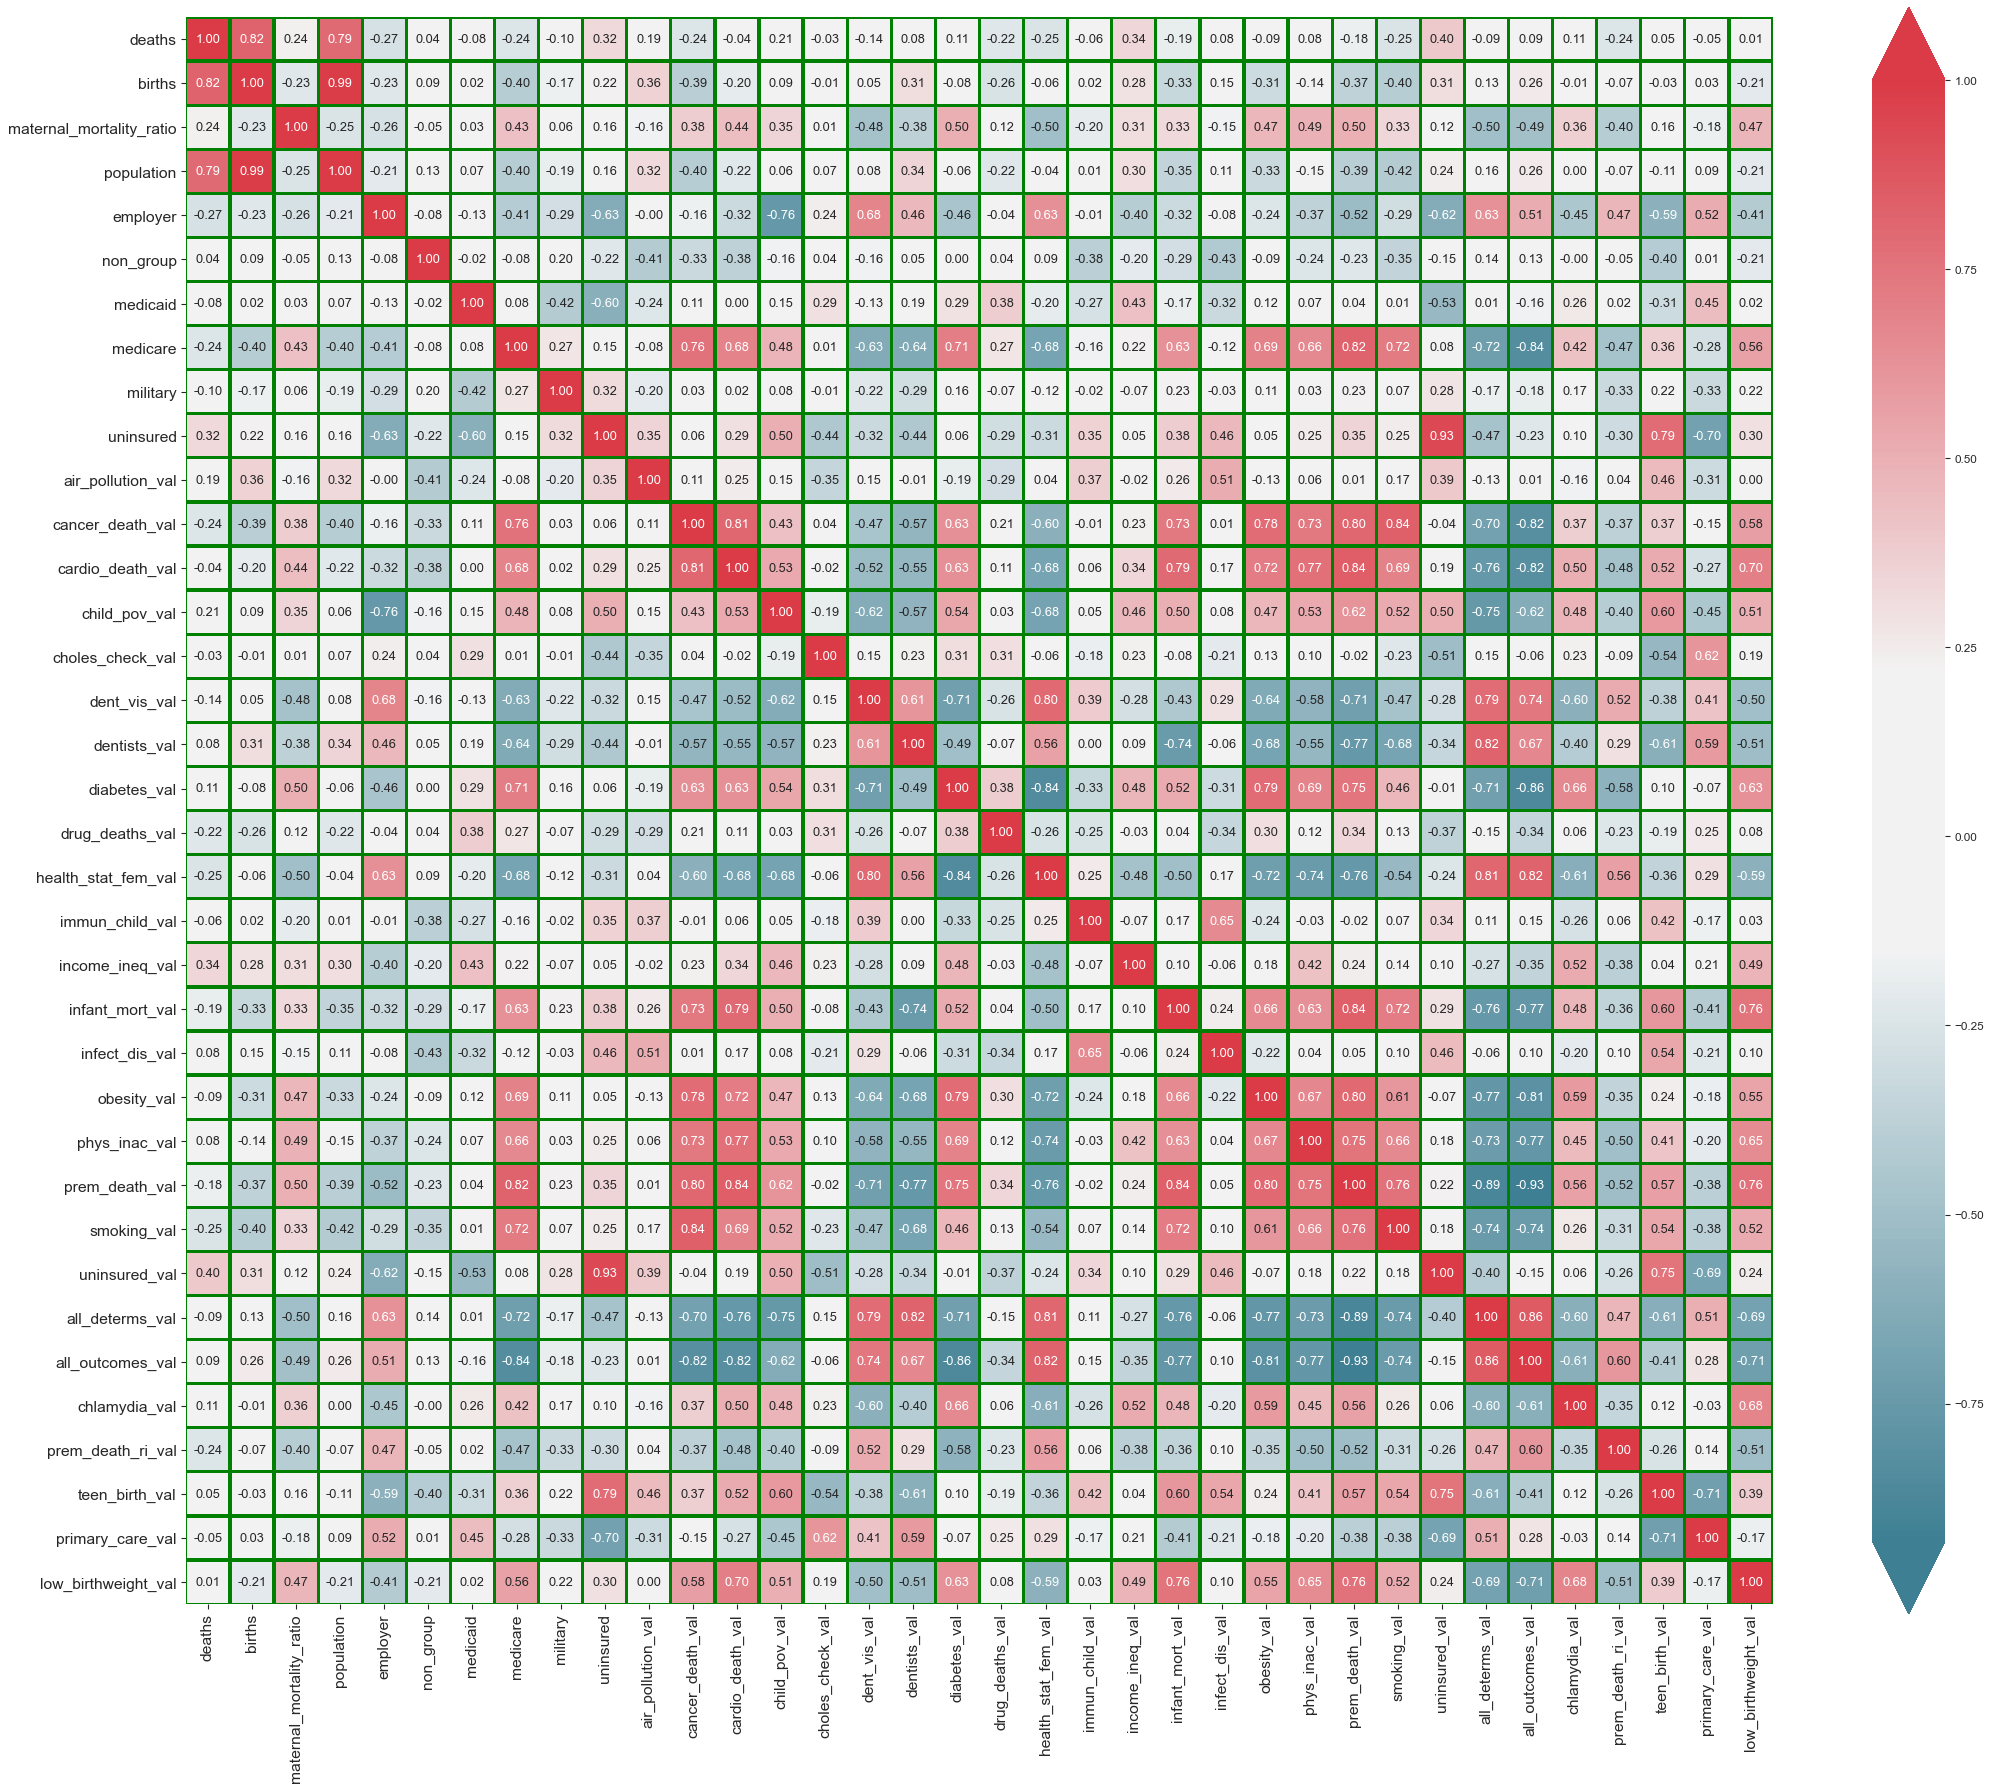

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Using the figure, axes together using `plt.subplots()` function:
fig, ax = plt.subplots(figsize=(32, 28), dpi=80, facecolor='w', edgecolor='k')

# Calculating the correlation matrix for each features in dataset 
corr = selected_features.dropna().corr()

# Setting features
top_corr_features = corr.index
sns.set_theme(context = "paper", style="ticks", font_scale=1.2)

# Plotting the heatmap
sns.heatmap(corr[top_corr_features], mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, sep=50, as_cmap=True),
            square=True, annot=True, ax=ax, fmt='.2f', linewidths=2, linecolor='green', cbar_kws={"shrink": .95, "extend":'both'})

### Creating a Train Test Split
***
We are using `maternal_mortality_ratio` for the y values

In [11]:
# Selecting and assigning the X & y values
y = mmr_without_race['maternal_mortality_ratio'].values.reshape(-1,1)
X = selected_features.drop(columns=['maternal_mortality_ratio'], axis=1)

In [12]:
# Print the selecting X & y shapes
print('Shape:', X.shape, y.shape)

Shape: (308, 35) (308, 1)


#### Create a Train Test Split

In [13]:
# Spliting our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

In [14]:
# Checking X_train length
len(X_train)

215

In [15]:
# Checking y_train length
len(y_train)

215

In [16]:
type(y_train)

numpy.ndarray

In [17]:
type(X_train)

pandas.core.frame.DataFrame

### Linear Regression Baseline Model

In [18]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [19]:
# Step 1: Creating a linear regression model
model = LinearRegression()
model

LinearRegression()

In [20]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [21]:
# Step 2: Fitting (train) our model to the data
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Obtaining the coefficient of determination (R2)
r_sq = model.score(X_train, y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.8235084247369209


In [23]:
# Printing the intercept
print('intercept:', model.intercept_)

intercept: [580.60304997]


In [24]:
# Printing the slope
print('slope:', model.coef_)

slope: [[ 7.07037398e-01 -1.09890116e-04 -2.15839898e-06 -6.58987326e+00
  -5.20998233e+00 -5.76406966e+00 -4.85585900e+00 -7.02318145e+00
  -5.75520920e+00  1.97330714e+00 -8.94199832e-02 -1.78994668e-02
  -2.26977515e-01  2.42550576e-01  1.27490183e-01  1.85316079e-01
  -1.67522528e-01 -6.48584353e-01  4.49901602e-01 -1.92290074e-02
   7.11229890e+00 -5.14287840e-01 -8.65234373e-02 -1.87426920e-01
  -4.69580646e-02  9.35929251e-03 -1.60684240e-01 -6.32454889e-01
  -2.25693171e+00  2.25888491e+00 -1.29088122e-02 -2.02782689e+00
  -4.14067808e-01 -6.80840716e-02 -2.73120816e+00]]


In [25]:
# Step 3: Predicting
y_pred = model.predict(X_test)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[[47.5901602 ]
 [41.04682916]
 [29.05783851]
 [29.20443704]
 [27.64618883]
 [22.91973089]
 [19.6546465 ]
 [15.80233006]
 [32.29593363]
 [ 5.95995877]
 [33.40610213]
 [31.47887769]
 [30.5644044 ]
 [19.02129564]
 [34.1957098 ]
 [41.79714334]
 [22.61764897]
 [38.92790058]
 [35.36862803]
 [18.12076172]
 [19.77203557]
 [42.47421712]
 [50.05305423]
 [35.33757299]
 [25.7586805 ]
 [37.06452904]
 [37.54297511]
 [23.32374768]
 [34.31770457]
 [42.89749796]
 [55.17427899]
 [56.98692803]
 [56.65705425]
 [21.23658714]
 [ 7.67197822]
 [16.21980733]
 [39.00793194]
 [54.81460903]
 [36.51941891]
 [ 8.10648259]
 [46.48014162]
 [34.05466806]
 [29.68599543]
 [25.20662905]
 [34.33654232]
 [29.87933015]
 [37.69947775]
 [36.72806234]
 [26.30325303]
 [47.52292411]
 [27.92743739]
 [34.73297297]
 [26.53545848]
 [27.60161488]
 [33.24630088]
 [13.4814629 ]
 [15.671204  ]
 [24.00868203]
 [ 5.76617349]
 [45.12105203]
 [31.69668696]
 [24.57026638]
 [23.43331942]
 [28.57039788]
 [18.99150431]
 [15.

In [26]:
# Predicting the min & max values
X_min = np.array([X.min()])
X_max = np.array([X.max()])
print(f"Min X Value: {X_min}")
print(f"Max X Value: {X_max}")

Min X Value: [[ 1.00000e+01  1.82480e+04  7.82258e+05  4.68000e+01  4.50000e+00
   6.60000e+00  8.00000e-01  3.00000e-01  2.60000e+00  5.70000e+00
   1.42300e+02  1.82700e+02  8.00000e+00  6.63000e+01  5.41000e+01
   3.86000e+01  5.90000e+00  6.00000e+00  3.93000e+01  5.71000e+01
   3.70000e+00  4.10000e+00 -1.01700e+00  2.02000e+01  1.57000e+01
   5.35800e+03  8.80000e+00  2.70000e+00 -7.67000e-01 -3.83000e-01
   2.37500e+02  1.00000e+00  8.50000e+00  7.61000e+01  6.10000e+00]]
Max X Value: [[1.6800000e+02 5.2702000e+05 1.9893468e+07 6.9900000e+01 1.4500000e+01
  3.1000000e+01 4.2000000e+00 5.2000000e+00 2.9900000e+01 1.5300000e+01
  2.3490000e+02 3.7370000e+02 3.3700000e+01 9.1100000e+01 8.1600000e+01
  8.2700000e+01 1.5200000e+01 4.1400000e+01 6.1700000e+01 9.5980000e+01
  5.8300000e+00 1.0300000e+01 3.9900000e+01 3.9500000e+01 3.7200000e+01
  1.1485000e+04 2.8300000e+01 2.5600000e+01 7.7800000e-01 3.4100000e-01
  7.9910000e+02 3.3000000e+00 7.1900000e+01 2.4500000e+02 1.2300000e+01

In [27]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(X_min)
y_max = model.predict(X_max)
print(f"Min Y Value: {y_min}")
print(f"Max Y Value: {y_max}")

Min Y Value: [[265.61100908]]
Max Y Value: [[-293.85697733]]


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Using the model to predict a value
predicted = model.predict(X)

# Scoring the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 37.52083832622239
R-squared (R2 ): 0.781050966012186


In [29]:
# Calling the `score` method on the model to show the r2 score
model.score(X_test, y_test)

0.6853628805934203

In [30]:
# Fitting the model to the training data and calculating the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8235084247369209
Testing Score: 0.6853628805934203


Text(0.5, 1.0, 'Maternal Mortality')

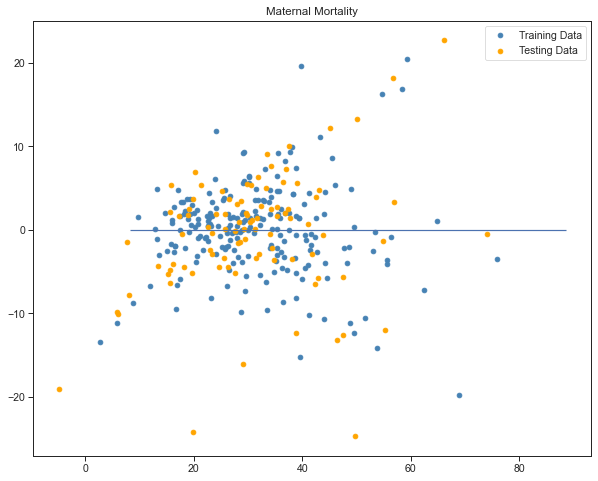

In [31]:
# Plotting training and testing data
plt.figure(figsize=(10,8))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="steelblue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Maternal Mortality")

### Create a simple lineaer regression model to make predictions for selected features

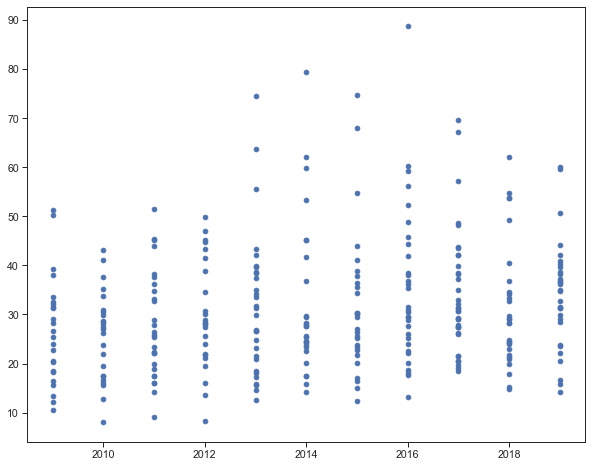

In [32]:
# Make predictions for maternal mortality ratio
X1 = mmr_without_race["year"].values.reshape(-1,1)
y1 = mmr_without_race["maternal_mortality_ratio"].values.reshape(-1,1)
plt.figure(figsize=(10,8))
plt.scatter(X1,y1)

In [33]:
# Using the `train_test_split` to create a training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [34]:
# Creating the linear regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [35]:
model1.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [36]:
# Making the predictiions and displaying r2

from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r2 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r2}")

MSE: 176.33275791463802, R2: 0.017167652416888557


In [39]:
# Make predictions for next 10 years
maternal_mortality_ratio =[]
for i in range(2019, 2030):
    r= model1.predict([[i]])
    maternal_mortality_ratio.append(float(r))
      
    
print(f"Maternal Mortality Ratio for the next 10 years:")
maternal_mortality_ratio

Maternal Mortality Ratio for the next 10 years:


[35.67735072215555,
 36.49053571924151,
 37.30372071632746,
 38.116905713413416,
 38.93009071049937,
 39.74327570758555,
 40.55646070467151,
 41.36964570175746,
 42.18283069884342,
 42.9960156959296,
 43.809200693015555]

In [40]:
# Creating a dictionary that holds predicted values
mmr_prediction = {
    "year":[2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "maternal_mortality_ratio": maternal_mortality_ratio
}

# Creating a new dataframe to hold predictions
mmr_10years_predictions = pd.DataFrame(mmr_prediction)
mmr_10years_predictions

,year,maternal_mortality_ratio
0,2020,35.677351
1,2021,36.490536
2,2022,37.303721
3,2023,38.116906
4,2024,38.930091
5,2025,39.743276
6,2026,40.556461
7,2027,41.369646
8,2028,42.182831
9,2029,42.996016
